In [385]:
import pandas as pd
import numpy as np

train_path = "optdigits.tra" 
df_train = pd.read_csv(train_path, header=None)

test_path = "optdigits.tes" 
df_test = pd.read_csv(test_path, header=None)

X_train = df_train[np.arange(64)] 
Y_train = df_train[64] 

X_testing = df_test[np.arange(64)] 
y_testing = df_test[64] 

X_train = X_train - np.mean(X_train)
X_train = X_train / (np.std(X_train) + 1e-8)


print(X_train)


       0         1         2         3         4         5         6   \
0     0.0  0.805961  0.111894  0.749917  0.120901 -0.802762 -0.411567   
1     0.0 -0.347610  0.975639  0.984700 -1.201570 -0.980941 -0.411567   
2     0.0 -0.347610  0.543766  0.749917  1.002548  1.335389 -0.411567   
3     0.0 -0.347610 -1.183724 -2.067477 -0.099511  1.869927 -0.411567   
4     0.0 -0.347610 -0.104043  0.515134 -1.642393 -0.980941 -0.411567   
...   ...       ...       ...       ...       ...       ...       ...   
3818  0.0 -0.347610 -0.104043  0.280352 -0.099511 -0.624583 -0.411567   
3819  0.0 -0.347610 -1.183724 -2.537043  0.120901 -0.802762 -0.411567   
3820  0.0 -0.347610 -0.535915  0.749917 -2.524041 -0.980941 -0.411567   
3821  0.0 -0.347610  0.111894  0.984700 -2.083217 -0.980941 -0.411567   
3822  0.0 -0.347610 -0.751852  0.749917  1.002548  1.335389 -0.114919   

            7         8         9   ...        54        55        56  \
0    -0.135332 -0.023629  1.651237  ... -0.763907 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [386]:
def sigmoid_activation(x):
   return 1 / (1 + np.exp(-x))

def mse_loss(actual, pred):
  loss = 1/2 * np.mean(np.asarray(pred - actual)**2)
  return loss

In [387]:

def init_parameters(n_input_units,n_hidden_units,n_output_units):
  np.random.seed(1)

  #Hidden layer weights and bias
  W_hid = np.random.randn(n_hidden_units, n_input_units)*0.01
  b_hid = np.zeros((n_hidden_units,1))

  #Output layer weights and bias
  W_out = np.random.randn(n_output_units, n_hidden_units)*0.01 
  b_out = np.zeros((n_output_units,1))

  parameters = {"W_hid" : W_hid, "b_hid" : b_hid,"W_out" : W_out,"b_out" : b_out}

  return parameters

def forward_propagation(X_train, parameters):
    # Calculate the value of the hidden layer
    hidden_val = np.dot(parameters["W_hid"], X_train) + parameters["b_hid"]
    
    # Apply sigmoid activation to the hidden layer value
    hidden_activation = sigmoid_activation(hidden_val)
    
    # Calculate the value of the output layer
    output_val = np.dot(parameters["W_out"], hidden_activation) + parameters["b_out"]
    
    # Save the hidden layer value and activation and output layer value for later use
    saved_vals = {'hidden_val': hidden_val, 'hidden_activation': hidden_activation, 'output_val': output_val}
    
    # Return the output layer value and the saved values
    return output_val, saved_vals

def backward_propagation(X_train,parameters,save_forward_parameters,No_batch):
    
    
    output = save_forward_parameters["output_val"]- X_train

    output = np.asarray(output)

    deriv_output_w = np.dot(output, save_forward_parameters["hidden_activation"].T)/No_batch

    # Calculate the gradient of the output biases
    deriv_output_b = np.sum(output, axis=1,keepdims=True) / No_batch

    # Calculate the gradient of the hidden layer
    deriv_hidden = np.dot(parameters["W_out"].T, output) * (1 - np.power(save_forward_parameters["hidden_val"], 2))

    # Calculate the gradient of the hidden weights
    deriv_hidden_w = np.dot(deriv_hidden, X_train.T) /No_batch

    # Calculate the gradient of the hidden biases
    deriv_hidden_b = np.sum(deriv_hidden, axis=1,keepdims=True) / No_batch

    gradients = {'deriv_hidden_w': deriv_hidden_w,  'deriv_hidden_b': deriv_hidden_b, 'deriv_output_w': deriv_output_w,  'deriv_output_b': deriv_output_b}
    
    return gradients


def update_parameters(parameters, gradients, learning_rate=0.001):
    # Update the weights of the hidden layer
    W_hid = parameters["W_hid"] - learning_rate * gradients["deriv_hidden_w"]
    
    # Update the biases of the hidden layer
    b_hid = parameters["b_hid"] - learning_rate * gradients["deriv_hidden_b"]
    
    # Update the weights of the output layer
    W_out = parameters["W_out"] - learning_rate * gradients["deriv_output_w"]
    
    # Update the biases of the output layer
    b_out = parameters["b_out"] - learning_rate * gradients["deriv_output_b"]
    
    # Save the updated weights and biases in a dictionary
    update_parameters = {"W_hid": W_hid, "b_hid": b_hid, "W_out": W_out, "b_out": b_out}
    
    # Return the updated weights and biases
    return update_parameters

def generate_batches(X_train, No_batch):
    # Initialize a list to store the batches
    batches = []
    
    # Get the length of the data
    data_length = len(X_train)
    
    # Iterate over the data in increments of the batch size
    for i in range(0, data_length, No_batch):
        # If the current index plus the batch size is less than or equal to the length of the data,
        # create a batch by slicing the data from the current index to the current index plus the batch size
        if i + No_batch <= data_length:
            batch = X_train[i:i+No_batch]
        # Otherwise, create a batch by slicing the data from the current index to the end of the data
        else:
            batch = X_train[i:]
        # Append the batch to the list of batches
        batches.append(batch)
        
    # Return the list of batches
    return batches

def measure_accuracy(pred, actual):
    # Convert the predicted  and actual  to arrays
    pred = np.asarray(pred)
    actual = np.asarray(actual)
    
    # Compare the predicted labels and actual labels 
    correct = pred == actual
    
    # Calculate the proportion of correct predictions
    measure_accuracy = correct.mean()
    
    return measure_accuracy

In [388]:
def train_MLP(X_train, n_input_units, n_hidden_units, n_output_units, No_batch, iterations=151):
    # Initialize the network's weights and biases
    parameters = init_parameters(n_input_units, n_hidden_units, n_output_units)
    
    # Divide the training data into batches
    batches = generate_batches(X_train, No_batch)
    
    # Loop through the specified number of iterations
    for iteration in range(iterations):
        # Initialize the total cost for this iteration
        cost = 0
        
        # Loop through each batch of data
        for batch in batches:
            # Feed the data through the network and get the output and saved values
            output, saved_vals = forward_propagation(batch.T, parameters)
            
            # Calculate the loss of the predictions
            cost += mse_loss(batch.T, output+1e-10)
            
            # Backpropagate the error through the network to update the weights and biases
            gradients = backward_propagation(batch.T, parameters, saved_vals, No_batch)
            
            # Update the network's weights and biases
            parameters = update_parameters(parameters, gradients)
        
        # Calculate the average loss for this iteration
        cost = cost / len(batches)
        
        # Print the iteration and average loss
        print(f"Iteration {iteration+1}: loss = {cost}")
    
    # Return the trained weights and biases
    return parameters
    
parameters = train_MLP(X_train, 64, 2, 64, 128)


def predict(X_train, parameters):
    # Feed the data through the network and get the output and saved values
    y_pred, saved_vals = forward_propagation(X_train, parameters)
    
    # Return the saved values
    return saved_vals

save_vals = predict(X_train.T,parameters)

hidden_activation = save_vals["hidden_activation"].T

Iteration 1: loss = 0.4845723084222508
Iteration 2: loss = 0.4845658932084989
Iteration 3: loss = 0.48455973536524166
Iteration 4: loss = 0.48455368569015206
Iteration 5: loss = 0.4845475964115309
Iteration 6: loss = 0.48454131602292416
Iteration 7: loss = 0.4845346841795544
Iteration 8: loss = 0.4845275265517115
Iteration 9: loss = 0.48451964956793997
Iteration 10: loss = 0.484510835032424
Iteration 11: loss = 0.48450083467149974
Iteration 12: loss = 0.48448936475903254
Iteration 13: loss = 0.48447610109356887
Iteration 14: loss = 0.4844606747520591
Iteration 15: loss = 0.48444266921831086
Iteration 16: loss = 0.4844216196593116
Iteration 17: loss = 0.48439701526178536
Iteration 18: loss = 0.4843683055873203
Iteration 19: loss = 0.4843349117845244
Iteration 20: loss = 0.48429624314041564
Iteration 21: loss = 0.48425171882556145
Iteration 22: loss = 0.4842007938325306
Iteration 23: loss = 0.4841429871840902
Iteration 24: loss = 0.4840779097648397
Iteration 25: loss = 0.4840052889087086

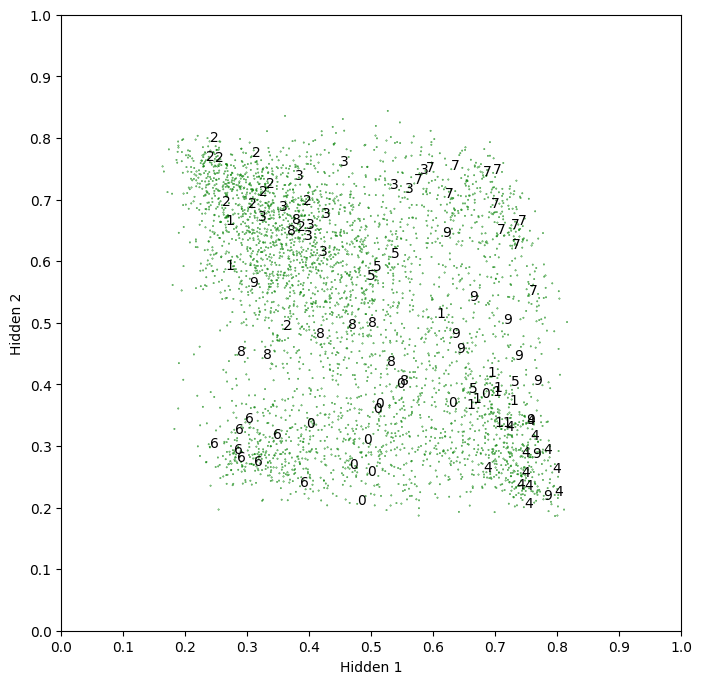

0       0
1       0
2       7
3       4
4       6
       ..
3818    9
3819    4
3820    6
3821    6
3822    7
Name: 64, Length: 3823, dtype: int64


In [389]:
import matplotlib.pyplot as plt

def plot_scatter(X, Y):

    plt.figure(figsize=(8, 8))

    colors = ['green'] * len(Y)


    plt.scatter(X[:, 0],X[:, 1], c=colors, s=0.1)


    # Add labels to the first 100 points on the plot
    for i, label in enumerate(Y[:100]):
        plt.annotate(label, (X[i, 0], X[i, 1]))

    # Add axis labels
    plt.xlabel('Hidden 1')
    plt.ylabel('Hidden 2')

    #  x and y limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Set tick intervals
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))

    plt.show()

plot_scatter(hidden_activation,Y_train)
print(Y_train)